# Numerical Methods for Solivng Ordinary Differential Equations
## Packages and Config

In [1]:
include("DiffSolve.jl")
using Plots, LaTeXStrings
figpath = "fig/"
Plots.default(lw=3, ms=5, fontfamily="Computer Modern",
    titlefontsize=18, tickfontsize=10, labelfontsize=14)

## RC Circuit

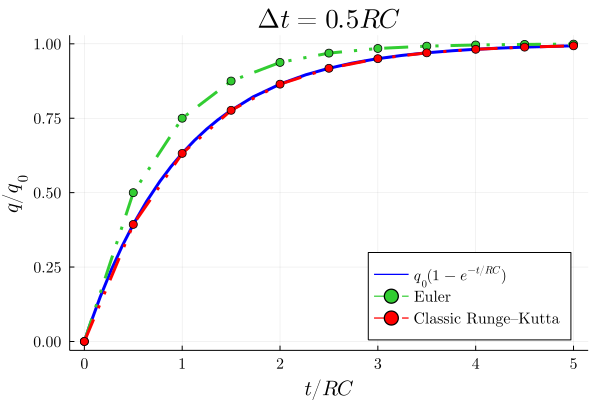

In [2]:
tmin, tmax, Δt = 0.0, 5.0, 0.5
q₀, rc = 1.0, 1.0

p = plot(t -> q₀ *(1 - exp(-t/rc)), tmin, tmax, color=:blue, label=L"q_0(1 - e^{-t/RC})",
    title=L"\Delta{t} = %$Δt RC", xlabel=L"t / RC", ylabel=L"q / q_0", legend=:bottomright)

time, charge = DiffSolve.eulersolve((t, x) -> (q₀ .- x) / rc, [0.0], tmin, tmax, step=Δt)
plot!(p, time, charge, ls=:dashdotdot, marker=:circle, color=:limegreen, label="Euler")

time, charge = DiffSolve.rk4((t, x) -> (q₀ .- x) / rc, [0.0], tmin, tmax, step=Δt)
plot!(p, time, charge, ls=:dashdotdot, marker=:circle, color=:red, label="Classic Runge–Kutta",
    legendfontsize=10)

savefig(p, figpath * "rc-sol.pdf")
display(p)

### Accuracy

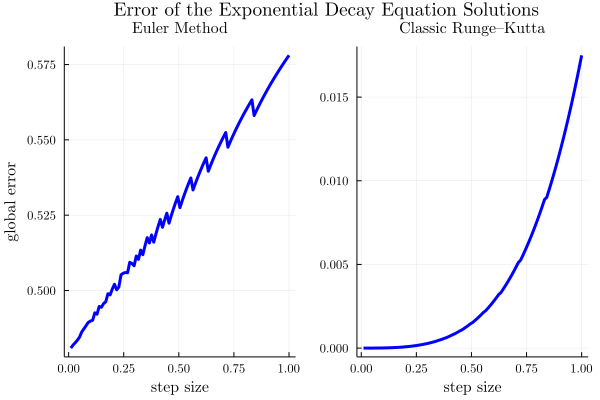

In [3]:
stepcount = 101
steps = collect(range(0.01, 1, length=stepcount))
error_euler, error_rk4, time_euler, time_rk4 = [Float64[] for _ in 1:4]

for step in steps
    ts, charge = DiffSolve.eulersolve((t, x) -> (q₀ .- x) / rc, [0.0], tmin, tmax, step=step)
    push!(error_euler, abs(sum(charge + exp.(-ts) .- 1)))
    ts, charge = DiffSolve.rk4((t, x) -> (q₀ .- x) / rc, [0.0], tmin, tmax, step=step)
    push!(error_rk4, abs(sum(charge + exp.(-ts) .- 1)))
end

pe = plot(steps, error_euler, color=:blue, title="Euler Method", ylabel="global error",
    titlefontsize=10)
prk4 = plot(steps, error_rk4, color=:blue, title="Classic Runge–Kutta", titlefontsize=10)
p = plot(pe, prk4, legend=false, plot_titlefontsize=12, labelfontsize=10, tickfontsize=8,
    xlabel="step size", plot_title="Error of the Exponential Decay Equation Solutions")

savefig(p, figpath * "rc-error.pdf")
display(p)

### Instability

In [4]:
function unstablesolve(func::Function, init::Float64, start::Float64, stop::Float64;
        step::Float64 = 0.5)
    ts = collect(range(start, stop, step=step)) # exclucive range
    xs = Vector{Float64}(undef, length(ts))

    xs[1] = init
    xs[2] = init + step * func(start, init)

    for i in 2:length(ts)-1
        xs[i + 1] = xs[i - 1] + 2 * step * func(ts[i], xs[i])
    end

    return ts, xs
end

unstablesolve (generic function with 1 method)

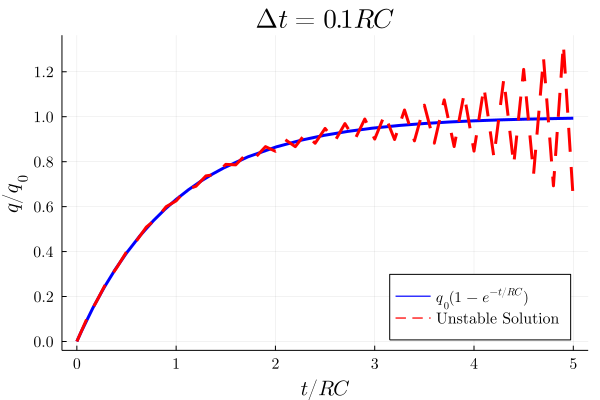

In [5]:
tmin, tmax, Δt = 0.0, 5.0, 0.1

p = plot(t -> q₀ *(1 - exp(-t/rc)), tmin, tmax, color=:blue, label=L"q_0(1 - e^{-t/RC})",
    title=L"\Delta{t} = %$Δt RC", xlabel=L"t / RC", ylabel=L"q / q_0", legend=:bottomright)

time, charge = unstablesolve((t, x) -> (q₀ - x) / rc, 0.0, tmin, tmax, step=Δt)
plot!(p, time, charge, ls=:dash, color=:red, label="Unstable Solution", legendfontsize=10)

savefig(p, figpath * "rc-unstable.pdf")
display(p)

## Simple Harmonic Oscillator

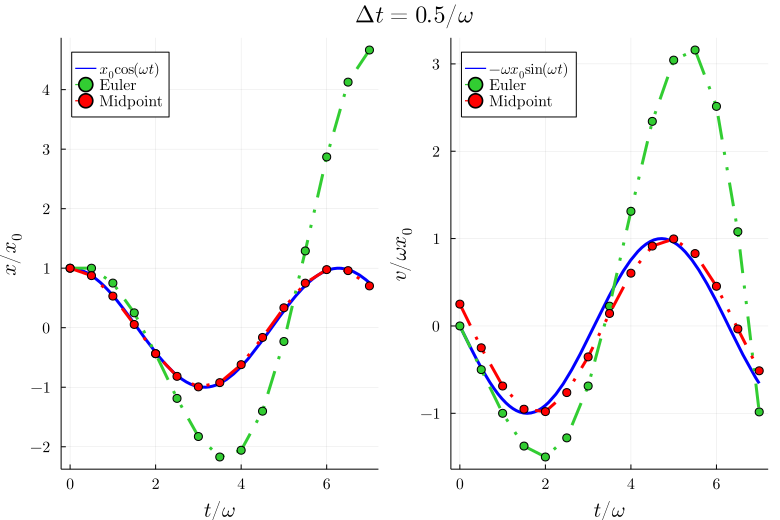

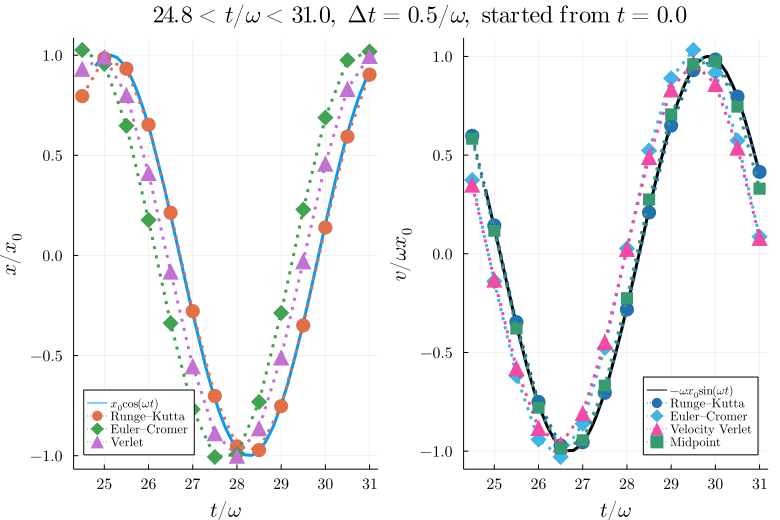

In [6]:
n = 5
tmin, tmax, Δt = 0.0, round(2π * n), 0.5

px = plot(cos, tmin, 7.0, label=L"x_0 \mathrm{cos}(\omega t)",
    xlabel=L"t / \omega", ylabel=L"x / x_0", color=:blue)
pv = plot(t -> -sin(t), tmin, 7.0, label=L"-\omega x_0 \mathrm{sin}(\omega t)",
    ylabel=L"v / \omega x_0", color=:blue)

time, x = DiffSolve.eulersolve((t, x) -> [x[2], -x[1]], [1.0, 0.0], tmin, 7.0, step=0.5)
plot!(px, time, x[:, 1], ls=:dashdotdot, marker=:circle, label="Euler", color=:limegreen)
plot!(pv, time, x[:, 2], ls=:dashdotdot, marker=:circle, label="Euler", color=:limegreen)

time, x, v = DiffSolve.eulermid((t, x) -> -x, 1.0, 0.0, tmin, 7.0, step=Δt)
plot!(px, time, x, ls=:dashdotdot, marker=:circle, label="Midpoint", color=:red, legendfontsize=10)
plot!(pv, time, v, ls=:dashdotdot, marker=:circle, label="Midpoint", color=:red, legendfontsize=10)

p = plot(px, pv, layout=(1, 2), plot_title=L"\Delta{t} = %$Δt / \omega", xlabel=L"t / \omega",
    legend=:topleft, size=(780, 520))
savefig(p, figpath * "sho-sol-euler.pdf")
display(p)

Plots.default(ls=:dot, markerstrokewidth=0, ms=8)

px = plot(cos, (n-1)/n * tmax, tmax, label=L"x_0 \mathrm{cos}(\omega t)",
    ylabel=L"x / x_0", legend=:bottomleft, lw=3, ls=:solid)
pv = plot(t -> -sin(t), (n-1)/n * tmax, tmax, label=L"-\omega x_0 \mathrm{sin}(\omega t)",
    ylabel=L"v / \omega x_0", legend=:bottomright, lw=3, ls=:solid, palette=:mk_8)

time, x = DiffSolve.rk4((t, x) -> [x[2], -x[1]], [1.0, 0.0], tmin, tmax, step=Δt)
plot!(px, time[((n-1)*end÷n):end], x[((n-1)*end÷n):end, 1], label="Runge–Kutta", marker=:circle)
plot!(pv, time[((n-1)*end÷n):end], x[((n-1)*end÷n):end, 2], label="Runge–Kutta", marker=:circle)

time, x, v = DiffSolve.eulercromer((t, x) -> -x, 1.0, 0.0, tmin, tmax, step=Δt)
plot!(px, time[((n-1)*end÷n):end], x[((n-1)*end÷n):end], label="Euler–Cromer", marker=:diamond)
plot!(pv, time[((n-1)*end÷n):end], v[((n-1)*end÷n):end], label="Euler–Cromer", marker=:diamond)

time, x, v = DiffSolve.verlet((t, x) -> -x, 1.0, 0.0, tmin, tmax, step=Δt)
plot!(px, time[((n-1)*end÷n):end], x[((n-1)*end÷n):end], label="Verlet", marker=:utriangle)
time, x, v = DiffSolve.velverlet((t, x) -> -x, 1.0, 0.0, tmin, tmax, step=Δt)
plot!(pv, time[((n-1)*end÷n):end], v[((n-1)*end÷n):end], label="Velocity Verlet", marker=:utriangle)

time, x, v = DiffSolve.eulermid((t, x) -> -x, 1.0, 0.0, tmin, tmax, step=Δt)
plot!(pv, time[((n-1)*end÷n):end], v[((n-1)*end÷n):end], label="Midpoint", marker=:rect, ms=6)

p = plot(px, pv, layout=(1, 2), size=(780, 520), xlabel=L"t / \omega",
    plot_title="\$$((n-1)/n * tmax) < t/\\omega < $tmax,\\ \\Delta{t} = $Δt / \\omega,\\ "
    * "\\textrm{started\\ from}\\ t=$tmin\$")
savefig(p, figpath * "sho-sol.pdf")
display(p)

Plots.default(ls=:solid, marker=:none, lw=3, markerstrokewidth=1, ms=5)

### Phase Space, Conservation of Energy

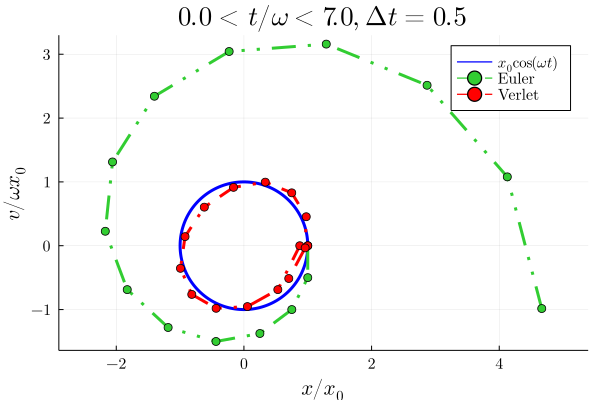

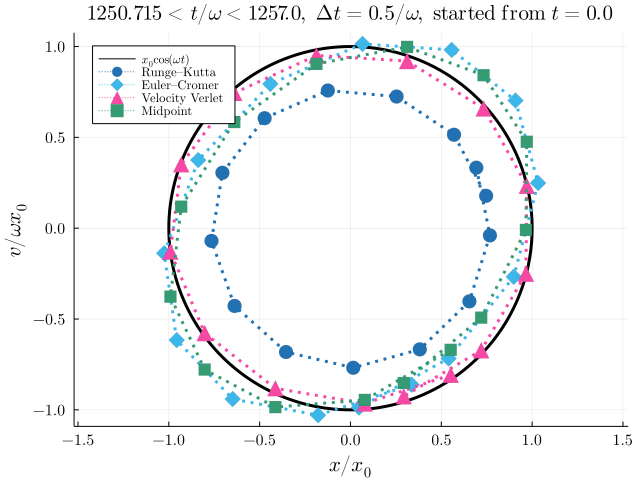

In [7]:
n = 200
tmin, tmax, Δt = 0.0, round(2π * n), 0.5

p = plot(cos, sin, tmin, 7.0, label=L"x_0 \mathrm{cos}(\omega t)",
    title=L"%$tmin < t/\omega < 7.0, \Delta{t} = %$Δt",
    xlabel=L"x / x_0", ylabel=L"v / \omega x_0",
    color=:blue, ratio=:equal)

time, x = DiffSolve.eulersolve((t, x) -> [x[2], -x[1]], [1.0, 0.0], tmin, 7.0, step=0.5)
plot!(p, x[:, 1], x[:, 2], ls=:dashdotdot, marker=:circle, label="Euler", color=:limegreen)

time, x, v = DiffSolve.verlet((t, x) -> -x, 1.0, 0.0, tmin, 7.0, step=Δt)
plot!(p, x, v, ls=:dashdotdot, marker=:circle, label="Verlet", color=:red,
    legendfontsize=10)

savefig(p, figpath * "sho-phase-euler.pdf")
display(p)

Plots.default(ls=:dot, markerstrokewidth=0, ms=8)

p = plot(cos, sin, (n-1)/n * tmax, tmax, palette=:mk_8, label=L"x_0 \mathrm{cos}(\omega t)",
    title="\$$((n-1)/n * tmax) < t/\\omega < $tmax,\\ \\Delta{t} = $Δt / \\omega,\\ "
    * "\\textrm{started\\ from}\\ t=$tmin\$", xlabel=L"x / x_0", ylabel=L"v / \omega x_0",
    legend=:topleft, ls=:solid, ratio=:equal, titlefontsize=14, size=(640, 480))

time, x = DiffSolve.rk4((t, x) -> [x[2], -x[1]], [1.0, 0.0], tmin, tmax, step=Δt)
plot!(p, x[((n-1)*end÷n):end, 1], x[((n-1)*end÷n):end, 2], label="Runge–Kutta", marker=:circle)

time, x, v = DiffSolve.eulercromer((t, x) -> -x, 1.0, 0.0, tmin, tmax, step=Δt)
plot!(p, x[((n-1)*end÷n):end], v[((n-1)*end÷n):end], label="Euler–Cromer", marker=:diamond)

time, x, v = DiffSolve.velverlet((t, x) -> -x, 1.0, 0.0, tmin, tmax, step=Δt)
plot!(p, x[((n-1)*end÷n):end], v[((n-1)*end÷n):end], label="Velocity Verlet", marker=:utriangle)

time, x, v = DiffSolve.eulermid((t, x) -> -x, 1.0, 0.0, tmin, tmax, step=Δt)
plot!(p, x[((n-1)*end÷n):end], v[((n-1)*end÷n):end], label="Midpoint", marker=:rect, ms=6)

savefig(p, figpath * "sho-phase.pdf")
display(p)

Plots.default(ls=:solid, marker=:none, lw=3, markerstrokewidth=1, ms=5)